In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stats
from datetime import date, timedelta
import sklearn
import re

import spacy

In [63]:
from nltk import pos_tag
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Section 1 - Data Pre Processing

In [68]:
df_1 = pd.read_csv('section_1.csv')

In [69]:
# Found a nan value so will remove all nans in data
df_1['summary'].loc[321]

nan

In [70]:
df_1 = df_1.dropna()

In [71]:
# Converting to lower case
df_1['summary'] = [i.lower() for i in df_1['summary']]

In [72]:
# Tokenize words to remove non-standard text
tokenizer = RegexpTokenizer(r"\w+")
df_1['summary'] = [' '.join(tokenizer.tokenize(i)) for i in df_1['summary']]

In [73]:
# Removing stopwords
sw = stopwords.words("english")
df_1['summary'] = [' '.join([i for i in j.split() if i not in sw]) for j in df_1['summary']]

In [ ]:
# Convert to vector
cv = CountVectorizer()
text_vector = cv.fit_transform(df_1['summary']).toarray()
df_vect = pd.DataFrame(text_vector)

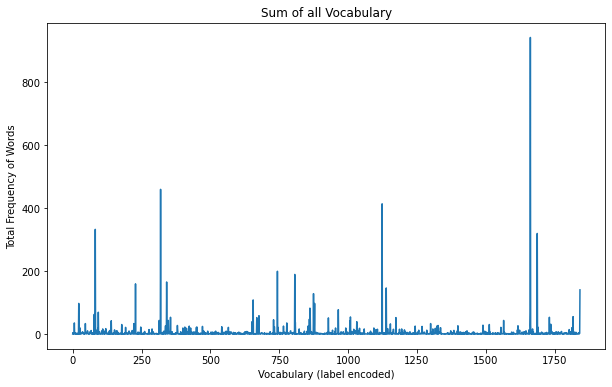

In [175]:
# My Vectorisation
plt.figure(figsize=(10,6))
df_vect.sum().plot()
plt.title('Sum of all Vocabulary')
plt.ylabel('Total Frequency of Words')
plt.xlabel('Vocabulary (label encoded)')
plt.savefig('My_results.png')

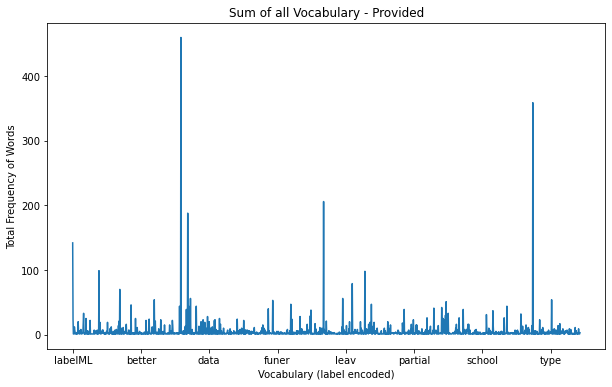

In [176]:
# Section 2 vectorisation
plt.figure(figsize=(10,6))
df_2 = pd.read_csv('section_2.csv')
df_2.sum().plot()
plt.title('Sum of all Vocabulary - Provided')
plt.ylabel('Total Frequency of Words')
plt.xlabel('Vocabulary (label encoded)')
plt.savefig('There_results.png')

Quick check to see if vecotrisation is similiar results to the section 2 .csv file

It appears that we have quite a high density of words around the right edge. This may be due to my cleaning process missing out a very common word amongst the vocabulary.

However we are in the same ball park and the peaks seem to correlate well.

In [91]:
np.shape(text_vector)

(599, 1841)

As we are using BOW approach this simply is a matrix where the rows represent each event/article and the columns is simply a vector containing the count of word occurences for each event in the document.

599 = Number of events

1841 = All words present in cleaned text

What we have done is a method of feature extraction which preprocess the text by converting it into numeric format also known as vectors .BoW keeps count of the total occurrences of most frequently used words.

In [109]:
# Adding labels onto end of vector dataframe
df_vect['labelML'] = df_1['label']

In [110]:
df_vect

,0,1,2,3,4,5,6,7,8,9,...,1832,1833,1834,1835,1836,1837,1838,1839,1840,labelML
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### 1.1 - Exploratory Analysis

In [111]:
# Splitting the inputed text
text = ' '.join(df_1['summary']).split()
word_freq = {} # Creating an empty dictionary to fill with summed values

# Looping through all the words in text to and adding them to dict key values
for word in text:
    if word not in word_freq:
        word_freq[word] = 0 
    word_freq[word] += 1
    


In [117]:
import operator
# Now sorting dictionaries, however this does now change dict into a string.   
word_sorted = sorted(word_freq.items(), key=operator.itemgetter(1))
end_word = len(word_sorted)

Below should have been plotted in bar chart but time constraints

### Top 10 words in document

In [127]:
word_sorted[end_word-10:end_word]

[('concerns', 54),
 ('uk', 54),
 ('markets', 55),
 ('investigation', 64),
 ('anticipated', 70),
 ('limited', 78),
 ('investigating', 83),
 ('acquisition', 98),
 ('competition', 166),
 ('cma', 460)]

Creating our Matrix with labels at end

In [ ]:
# Adding labels onto end of vector dataframe
df_vect['labelML'] = df_1['label']

# Section 2 - Model

In [141]:
# Section 2 vectorisation
df_2 = pd.read_csv('section_2.csv')
df_2

,labelML,0,5270864,61,10,101,102,11,12,13,...,wright,written,xpo,yamaha,yarn,year,york,yorkshir,you,ypo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# First task is to shuffle data to avoid order bias
df_2 = df_2.sample(frac = 1) 

In [143]:
# Seperating all target variables and data
y = df_2['labelML']
x = df_2.drop(['labelML'], axis=1)

In [147]:
from sklearn.model_selection import train_test_split
# Split into train and test set by 80% -> 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [149]:
# Using Random Forest Method to train model
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
# Actual class predictions
predictions = model.predict(X_test)

In [156]:
# Printing results beside actual to compare!
for i in range(0,len(predictions)):
    
    print('Predict = ', predictions[i], '|', 'Actual = ', y_test.iloc[i])

Predict =  1 | Actual =  1
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  1
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  1 | Actual =  1
Predict =  1 | Actual =  1
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  1 | Actual =  1
Predict =  0 | Actual =  1
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  1 | Actual =  1
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  1
Predict =  1 | Actual =  1
Predict =  1 | Actual =  0
Predict =  0 | Actual =  1
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
Predict =  0 | Actual =  0
P

In [157]:
# Probabilities for each class
probs = model.predict_proba(X_test)[:, 1]

In [159]:
# Now to evaluate model using - Receiver Operating Characteristic Area Under the Curve (ROC AUC)

from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, probs)

We have now created the model and now used the ROC AUC testing where we have 0.94 ROC AUC score which suggests are model is accurate as 1 is the highest score

In [161]:
roc_value

0.9453125

Confusion matrix, without normalization
[[92  4]
 [ 8 16]]


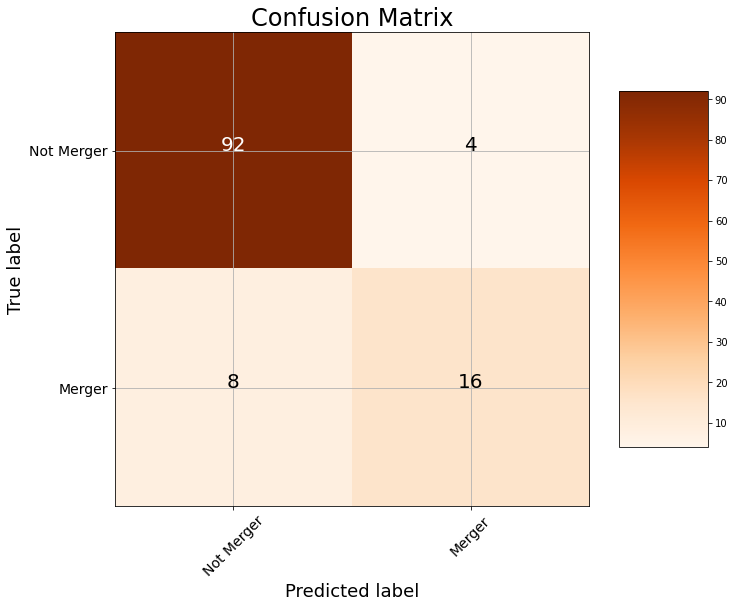

In [179]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions)
plot_confusion_matrix(CM, classes = ['Not Merger', 'Merger'],
                      title = 'Confusion Matrix')
plt.savefig('Confusion Matrix.png')

# Discussion

From the above confusion matrix this shows that we managed to correctly predict 92 not mergers and 16 mergers.

The low numbers of incorrectly predicted values 8 and 4 respectivly suggests that our model is accurate. 

Also what is apprent that our model is better at predicting if there is no merger rather than if there is a merger. As we only predicted 8% incorrect whilst for mergers we incorrectly predicted 20%.

In [167]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)